# Demand Prediction Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import RobustScaler
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("store_sharing.csv")

## 1. Exploratory Data Analysis

In [3]:
df.shape

(17414, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [5]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [6]:
pd.to_datetime(df.timestamp)

0       2015-01-04 00:00:00
1       2015-01-04 01:00:00
2       2015-01-04 02:00:00
3       2015-01-04 03:00:00
4       2015-01-04 04:00:00
                ...        
17409   2017-01-03 19:00:00
17410   2017-01-03 20:00:00
17411   2017-01-03 21:00:00
17412   2017-01-03 22:00:00
17413   2017-01-03 23:00:00
Name: timestamp, Length: 17414, dtype: datetime64[ns]

In [7]:
df["time"] = df["timestamp"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [8]:
df.groupby(df.time.dt.year).mean()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
time,,,,,,,,,
2015,1126.778433,12.619981,11.742624,71.363387,16.669029,2.749393,0.019438,0.284392,1.476686
2016,1164.449477,12.381404,11.382726,73.180998,15.171648,2.691804,0.022072,0.286010,1.494884
2017,523.333333,4.708333,1.583333,84.326389,14.743056,3.263889,0.333333,0.333333,3.000000


In [9]:
df.groupby(df.time.dt.weekday).mean()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
time,,,,,,,,,
0,1130.270734,12.324362,11.407895,73.143541,15.672049,2.748405,0.105263,0.0,1.492424
1,1230.105389,12.477445,11.598403,71.939521,15.927745,2.691417,0.009581,0.0,1.486228
2,1244.409000,12.645842,11.721776,71.791683,16.206910,2.701085,0.000000,0.0,1.478907
3,1258.810594,12.557584,11.584470,71.125602,16.098917,2.571027,0.000000,0.0,1.500803
4,1182.772653,12.429592,11.468980,72.351837,15.366327,2.586531,0.039184,0.0,1.498367
5,995.553753,12.567951,11.553753,72.682556,16.455172,2.860446,0.000000,1.0,1.496552
6,959.567265,12.276381,11.311710,73.235629,15.664105,2.898603,0.000000,1.0,1.491417


In [10]:
df.groupby(df.time.dt.month).mean()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
time,,,,,,,,,
1,784.691997,6.657364,4.197377,77.543376,17.861466,3.275050,0.032280,0.306658,3.0
2,836.279617,6.193525,3.606328,74.905813,16.874172,3.284032,0.000000,0.281089,3.0
3,921.294959,7.791213,5.615123,71.903781,16.836683,2.804496,0.032698,0.267030,0.0
4,1112.953408,10.206885,8.915855,67.532337,15.337622,2.463839,0.033380,0.283032,0.0
5,1275.099462,13.947917,13.670027,66.367272,16.982527,2.521505,0.064516,0.306452,0.0
6,1383.354430,16.704641,16.632560,68.945148,15.571730,2.574543,0.000000,0.270042,1.0
7,1543.696151,19.293720,19.252870,64.383525,16.822417,2.247806,0.000000,0.291020,1.0
8,1463.116577,19.224730,19.206873,67.289420,14.950472,2.330863,0.032345,0.291105,1.0
9,1356.597561,16.631277,16.612267,71.753228,13.611191,2.370875,0.000000,0.261836,2.0


In [11]:
df.groupby(df.time.dt.hour).mean()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
time,,,,,,,,,
0,290.609116,11.239641,10.238950,78.138467,13.954075,2.693370,0.022099,0.284530,1.488950
1,200.631215,10.976289,9.941759,79.301796,13.677947,2.820442,0.022099,0.284530,1.490331
2,136.303745,10.741331,9.662968,80.303745,13.385576,3.013870,0.022191,0.282940,1.492372
3,94.245492,10.531900,9.443135,81.077670,13.102635,2.886269,0.022191,0.284327,1.490985
4,73.313454,10.357143,9.236477,81.670596,12.959778,2.944521,0.022191,0.284327,1.490985
5,110.707351,10.253121,9.146325,82.106103,12.920943,2.986130,0.022191,0.284327,1.490985
6,466.626722,10.340220,9.207989,81.597107,13.390496,2.765840,0.022039,0.285124,1.494490
7,1468.745179,10.734848,9.605372,80.008953,13.975207,2.727273,0.022039,0.285124,1.493113
8,2882.823204,11.357044,10.271409,77.421271,14.783840,2.555249,0.022099,0.284530,1.494475


In [12]:
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


---
---

### Check Missing Values and Outliers

<AxesSubplot:>

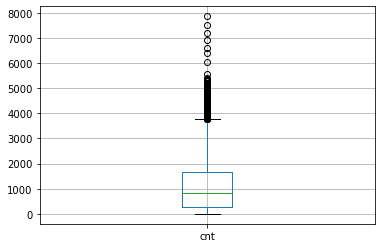

In [13]:
df.boxplot("cnt")

### Plot Breakdowns of Data

In [14]:
from scipy import stats

In [15]:
def outlier_detection(df, column, z_threshold=3):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
    ax[0].set_title(f"Histogram of {column} Column", c="blue", size=14)
    sns.histplot(df[column], ax=ax[0], palette="Blues")
    ax[1].set_title(f"Boxplot of {column} Column", c="blue", size=14)
    sns.boxplot(df[column], ax=ax[1], palette="Blues")
    z_score = np.abs(stats.zscore(df[column]))
    outliers = np.where(z_score > z_threshold)
    return outliers[0]

array([ 2433,  2434,  2568,  2592,  2712,  2736,  3072,  3096,  3264,
        3600,  3624,  3717,  3741,  3765,  3789,  3885,  3909,  3933,
        3957,  4077,  4101,  4125,  4230,  4231,  4245,  4254,  4255,
        4269,  4278,  4279,  4293,  4317,  4389,  4398,  4399,  4413,
        4437,  4446,  4447,  4460,  4461,  4462,  4469,  4470,  4471,
        4472,  4485,  4494,  4580,  4628,  4745,  4754,  4755,  4769,
        4793,  4913,  4937,  5081,  5105,  5128,  5129,  5137,  5138,
        5139,  5417,  5441,  5585,  5921,  5945,  5969,  6129,  6272,
        6392,  6416,  6440,  6464,  6488,  6608,  6632,  6727,  6751,
        6769,  6793,  6913,  6961,  7080,  7248,  7416,  7440,  7464,
        7600, 11099, 11243, 11267, 11411, 11603, 11627, 11636, 11651,
       11660, 11723, 11795, 11891, 11900, 11901, 11915, 11963, 12059,
       12083, 12107, 12131, 12395, 12404, 12405, 12419, 12443, 12467,
       12476, 12477, 12500, 12587, 12611, 12755, 12779, 12908, 12932,
       12956, 13052,

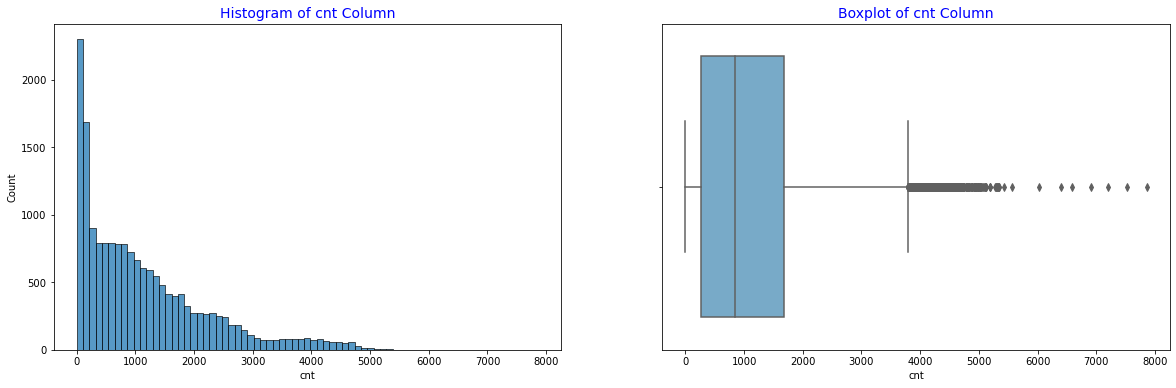

In [16]:
outlier_detection(df, "cnt")

<AxesSubplot:xlabel='time', ylabel='cnt'>

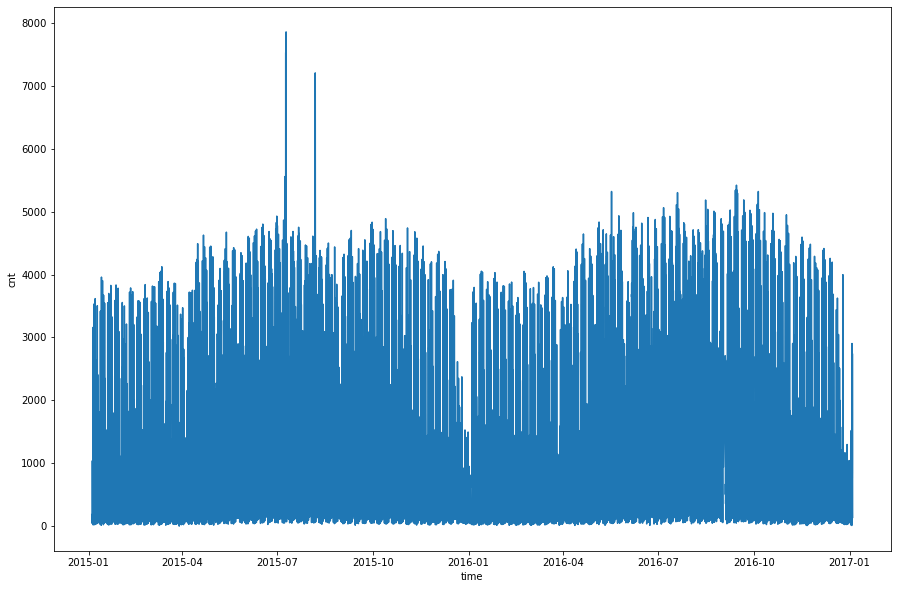

In [17]:
plt.figure(figsize=(15,10))
sns.lineplot(x="time", y="cnt", data=df)

<AxesSubplot:xlabel='cnt', ylabel='Density'>

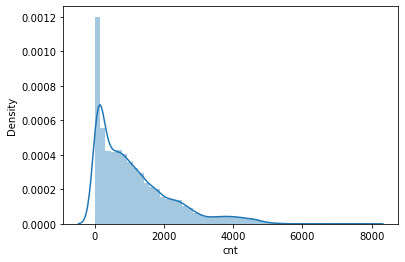

In [18]:
sns.distplot(df.cnt)

<AxesSubplot:xlabel='time', ylabel='cnt'>

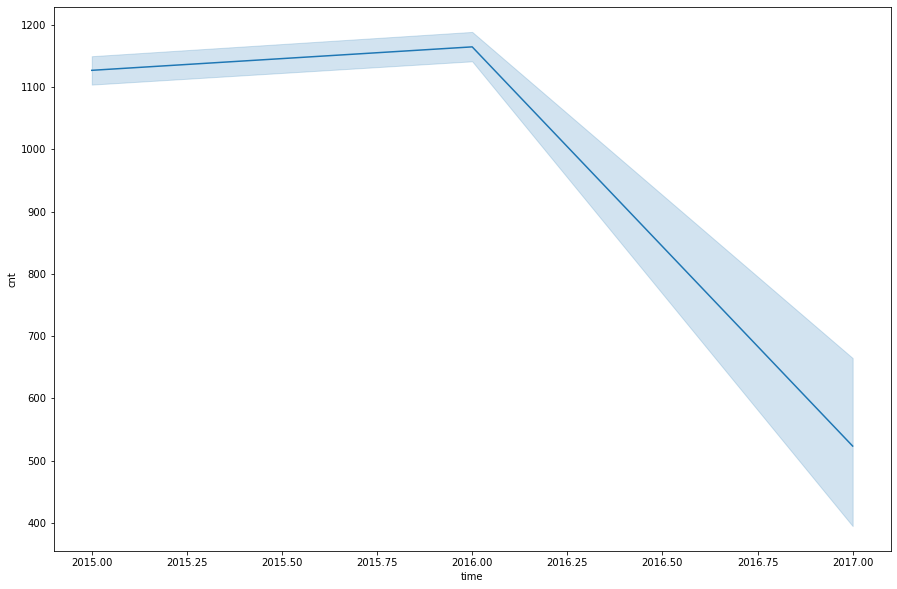

In [19]:
plt.figure(figsize=(15,10))
sns.lineplot(x=df.time.dt.year, y=df.cnt)

<AxesSubplot:xlabel='time', ylabel='cnt'>

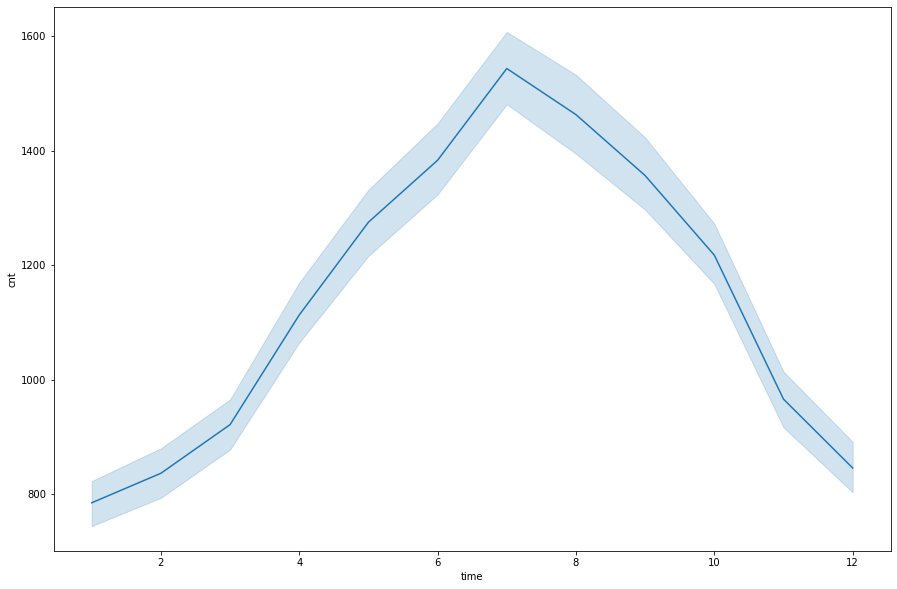

In [20]:
plt.figure(figsize=(15,10))
sns.lineplot(x=df.time.dt.month, y=df.cnt)

<AxesSubplot:xlabel='time', ylabel='cnt'>

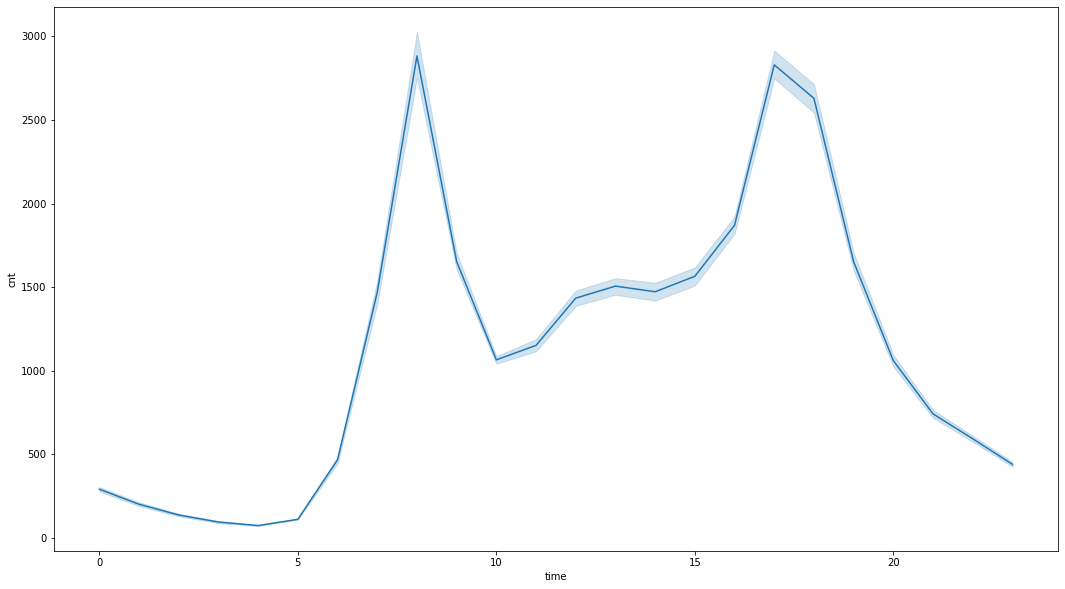

In [21]:
plt.figure(figsize=(18,10))
sns.lineplot(x=df.time.dt.hour, y=df.cnt)

<AxesSubplot:xlabel='time', ylabel='cnt'>

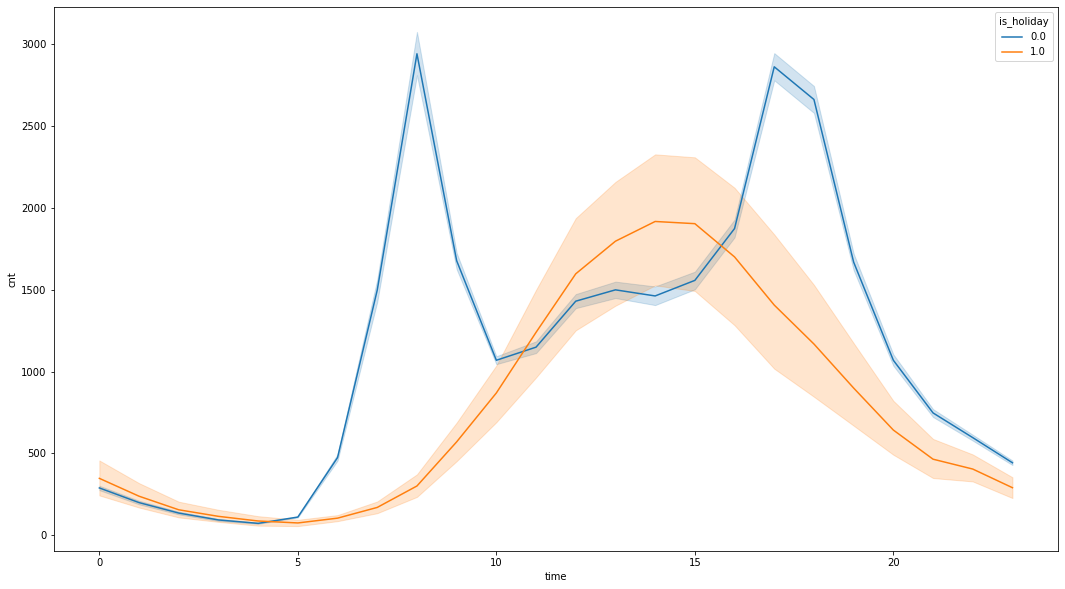

In [22]:
plt.figure(figsize=(18,10))
sns.lineplot(x=df.time.dt.hour, hue=df.is_holiday, y=df.cnt)

<AxesSubplot:xlabel='time', ylabel='cnt'>

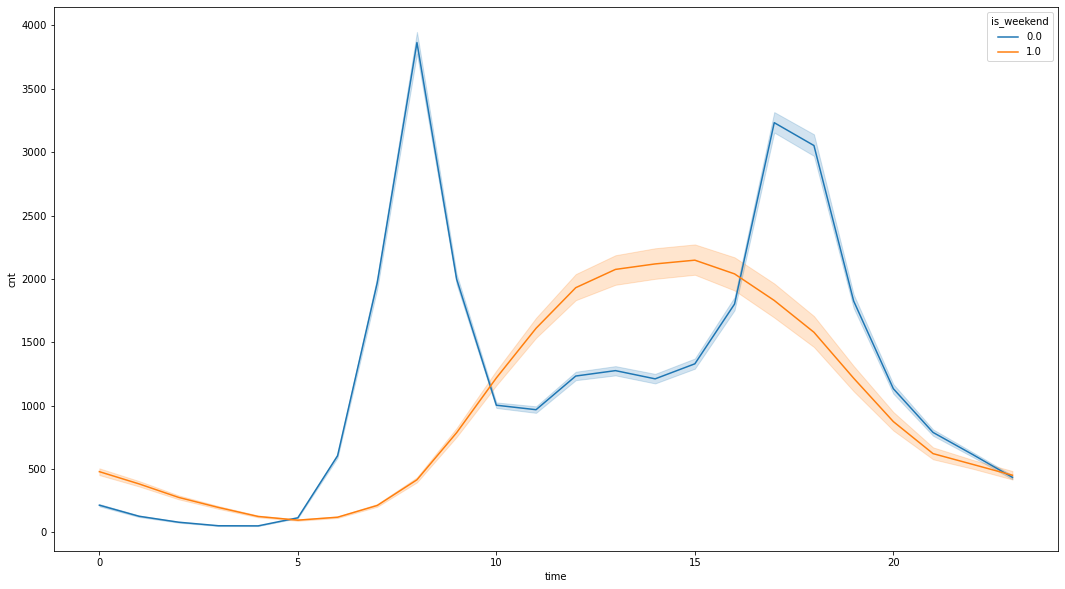

In [23]:
plt.figure(figsize=(18,10))
sns.lineplot(x=df.time.dt.hour, hue=df.is_weekend, y=df.cnt)

<AxesSubplot:xlabel='time', ylabel='cnt'>

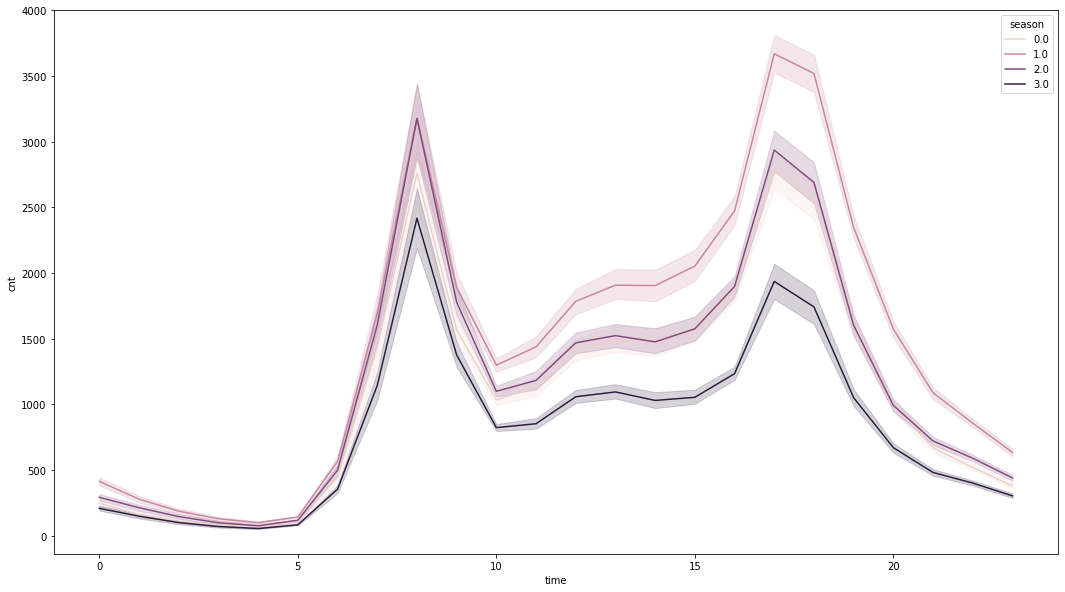

In [24]:
plt.figure(figsize=(18,10))
sns.lineplot(x=df.time.dt.hour, hue=df.season, y=df.cnt)

<AxesSubplot:xlabel='season', ylabel='cnt'>

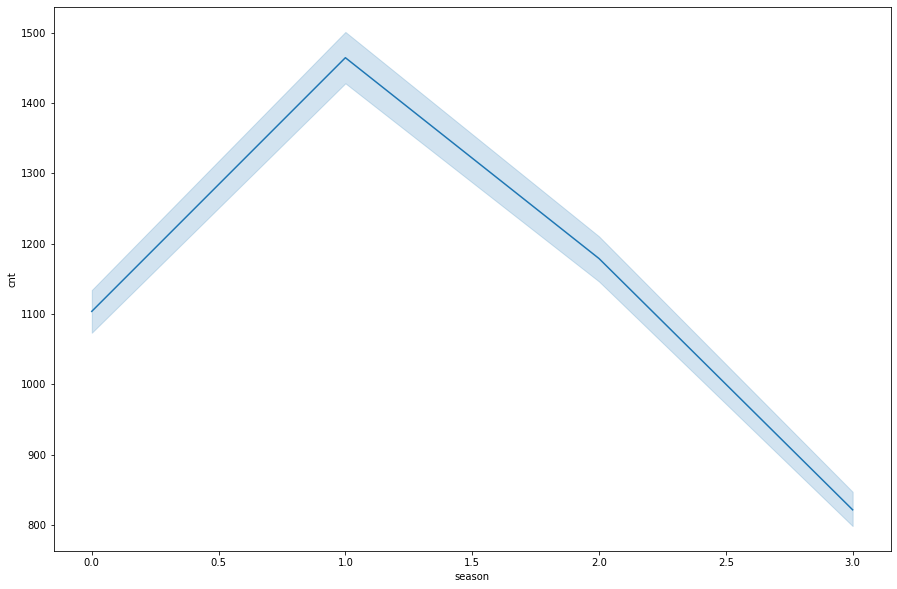

In [25]:
plt.figure(figsize=(15,10))
sns.lineplot(x=df.season, y=df.cnt)

***iv. Plot bike shares by day of week***

<AxesSubplot:xlabel='time', ylabel='cnt'>

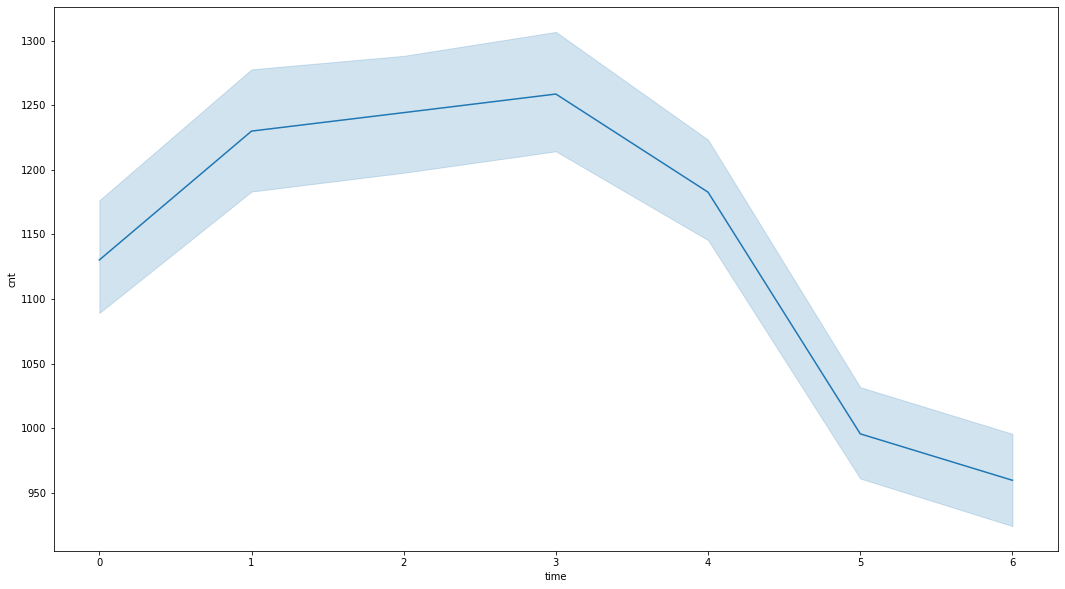

In [26]:
plt.figure(figsize=(18,10))
sns.lineplot(x=df.time.dt.weekday, y=df.cnt)

<AxesSubplot:xlabel='time', ylabel='cnt'>

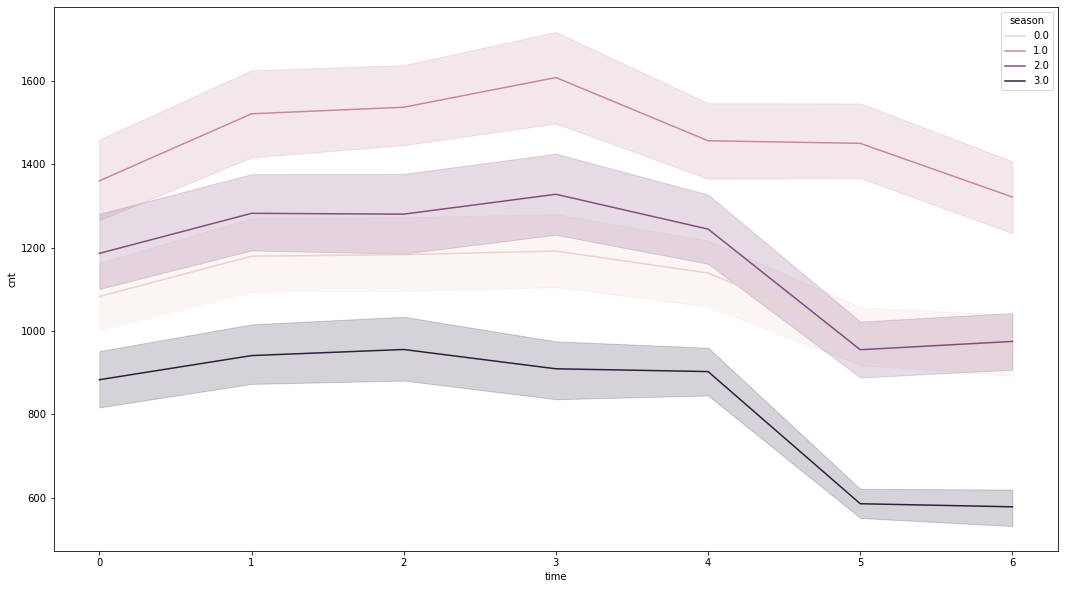

In [27]:
plt.figure(figsize=(18,10))
sns.lineplot(x=df.time.dt.weekday, hue=df.season, y=df.cnt)

***v. Plot the distribution of bike shares on holidays by seasons***

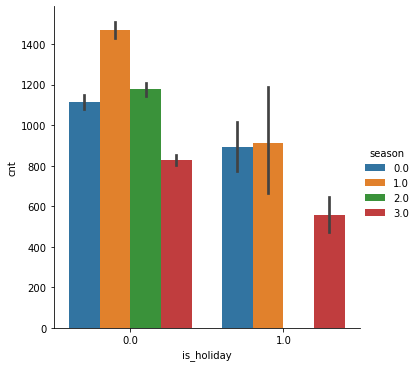

In [28]:
sns.catplot(
    data=df, kind="bar",
    x="is_holiday", hue="season", y="cnt")

## 2. Data Pre-Processing


In [29]:
df['hour'] = df.time.dt.hour
df['day_of_month'] = df.time.dt.day
df['day_of_week'] = df.time.dt.dayofweek
df['month'] = df.time.dt.month

In [32]:
df.drop(["timestamp", "time"], axis=1, inplace=True)

In [33]:
train_size = int(len(df) * 0.9)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

15672 1742


### Scaling

In [26]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_month,day_of_week,month
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,4,6,1
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,4,6,1
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,4,6,1
3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,4,6,1
4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,4,6,1


In [34]:
scale_columns = ['t1', 't2', 'hum', 'wind_speed']
transformer = RobustScaler()
cnt_transformer = RobustScaler()

In [28]:
transformer.fit(train[scale_columns])
cnt_transformer.fit(train[['cnt']])

RobustScaler()

In [29]:
train.loc[:, scale_columns] = transformer.transform(train[scale_columns])
train['cnt'] = cnt_transformer.transform(train[['cnt']])

In [30]:
test.loc[:, scale_columns] = transformer.transform(test[scale_columns])
test['cnt'] = cnt_transformer.transform(test[['cnt']])

### Define a Function for Creating Time Steps 

In [31]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [35]:
train

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_month,day_of_week,month
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,4,6,1
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,4,6,1
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,4,6,1
3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,4,6,1
4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,4,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15667,217,8.0,7.0,90.0,6.0,2.0,0.0,1.0,2.0,3,23,6,10
15668,150,8.0,7.0,93.0,6.0,2.0,0.0,1.0,2.0,4,23,6,10
15669,107,8.0,8.0,87.0,4.0,3.0,0.0,1.0,2.0,5,23,6,10
15670,107,8.0,7.0,90.0,6.5,3.0,0.0,1.0,2.0,6,23,6,10


In [50]:
train.iloc[0:10].values

array([[-0.46487603, -1.25      , -1.04761905,  0.975     , -0.81818182,
         3.        ,  0.        ,  1.        ,  3.        ,  0.        ,
         4.        ,  6.        ,  1.        ],
       [-0.49517906, -1.25      , -1.        ,  0.975     , -0.90909091,
         1.        ,  0.        ,  1.        ,  3.        ,  1.        ,
         4.        ,  6.        ,  1.        ],
       [-0.49793388, -1.3125    , -1.        ,  1.15      , -1.36363636,
         1.        ,  0.        ,  1.        ,  3.        ,  2.        ,
         4.        ,  6.        ,  1.        ],
       [-0.54063361, -1.375     , -1.04761905,  1.325     , -1.36363636,
         1.        ,  0.        ,  1.        ,  3.        ,  3.        ,
         4.        ,  6.        ,  1.        ],
       [-0.55785124, -1.375     , -1.23809524,  0.975     , -0.77272727,
         1.        ,  0.        ,  1.        ,  3.        ,  4.        ,
         4.        ,  6.        ,  1.        ],
       [-0.55853994, -1.375   

In [32]:
time_steps = 10

X_train, y_train = create_dataset(train, train.cnt, time_steps)
X_test, y_test = create_dataset(test, test.cnt, time_steps)

print(X_train.shape, y_train.shape)

(15662, 10, 13) (15662,)


---
---

## 3. Model Building with LSTM


In [33]:
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128, 
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [34]:
history = model.fit(
    X_train, y_train, 
    epochs=30, 
    batch_size=32, 
    validation_split=0.1,
    shuffle=False
)

Epoch 1/30
441/441 [==============================] - 13s 16ms/step - loss: 0.3802 - val_loss: 0.1140
Epoch 2/30
441/441 [==============================] - 6s 13ms/step - loss: 0.0912 - val_loss: 0.0571
Epoch 3/30
441/441 [==============================] - 5s 12ms/step - loss: 0.0575 - val_loss: 0.0438
Epoch 4/30
441/441 [==============================] - 5s 11ms/step - loss: 0.0425 - val_loss: 0.0400
Epoch 5/30
441/441 [==============================] - 5s 11ms/step - loss: 0.0321 - val_loss: 0.0351
Epoch 6/30
441/441 [==============================] - 5s 11ms/step - loss: 0.0263 - val_loss: 0.0384
Epoch 7/30
441/441 [==============================] - 5s 11ms/step - loss: 0.0242 - val_loss: 0.0377
Epoch 8/30
441/441 [==============================] - 5s 10ms/step - loss: 0.0217 - val_loss: 0.0335
Epoch 9/30
441/441 [==============================] - 5s 11ms/step - loss: 0.0223 - val_loss: 0.0348
Epoch 10/30
441/441 [==============================] - 5s 11ms/step - loss: 0.0210 - val_l

### Plot Train and Validation Losses

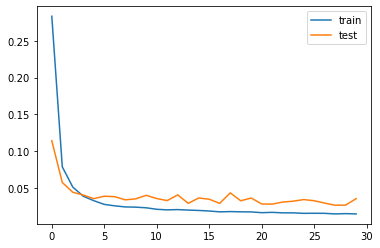

In [35]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

---
---

## 4. Demand Predictions

In [36]:
y_pred = model.predict(X_test)

### Inverse Transform

In [37]:
y_train_inv = cnt_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = cnt_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = cnt_transformer.inverse_transform(y_pred)

### Plot Prediction

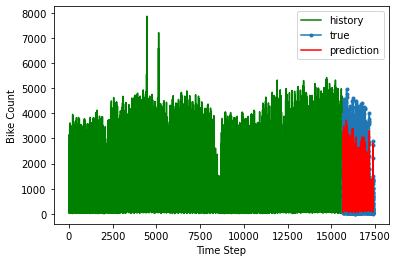

In [38]:
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

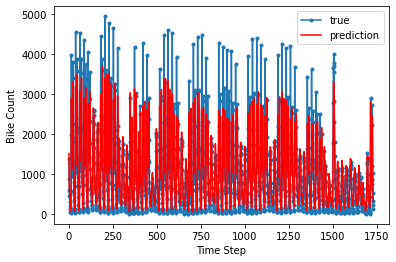

In [39]:
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

### Calculate Train and Test Error Scores

In [40]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [41]:
mean_absolute_error(y_test_inv.flatten(),y_pred_inv.flatten())

183.48266909909853

In [195]:
np.sqrt(mean_squared_error(y_test_inv.flatten(),y_pred_inv.flatten()))

285.7758653663378

In [196]:
explained_variance_score(y_test_inv.flatten(),y_pred_inv.flatten())

0.9065044446717191

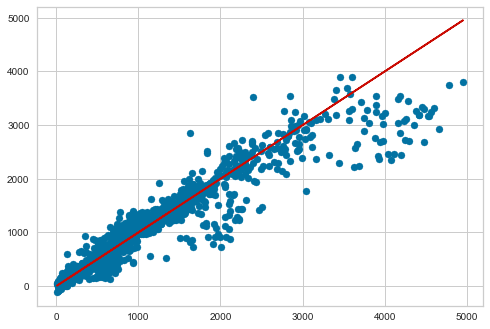

In [198]:
plt.scatter(y_test_inv.flatten(),y_pred_inv.flatten())

plt.plot(y_test_inv.flatten(),y_test_inv.flatten(),'r')